PCA Report on US Arrests

Desciption of Data: This data set contains statistics, in arrests per 100,000 residents,
for assault, murder, and rape in each of the 50 US states in 1973. Also given is the
percent of the population living in urban areas

In [5]:
#Importing required libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from pca import pca
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as method
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

#Ignoring OMP threadcount with k-means
import warnings
warnings.filterwarnings('ignore')


#### Uploading the dataset and previewing it to get an understanding using df. head and df.info functions

In [6]:
df = pd.read_csv('UsArrests.csv')
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### Inconsistent data types noticed, so amending few data types to float64

In [8]:
df['Assault'] = df['Assault'].astype('float64')
df['UrbanPop'] = df['UrbanPop'].astype('float64')
df.dtypes

City         object
Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object

### Checking for null values - No missing data

In [9]:
df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

### Statistical summary of dataset

In [10]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Scaling

#### In order to get an accurate analysis of our data, we need to bring each feature within the same range of values/same scale.

In [11]:
#select independent and standardize features

scaled = MinMaxScaler().fit_transform(df.iloc[:,1:5])

#create scaled version of dataframe

df_scale = pd.DataFrame(scaled,columns=df.columns[1:5])
df_scale.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


### Checking the correlation

<AxesSubplot: >

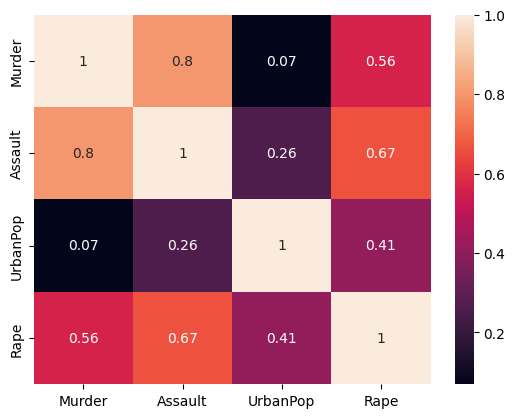

In [12]:
Arrest_corr = df_scale.corr()
sns.heatmap(df_scale.corr(),annot=True)
#plt.title('C')

### Noticed positive correlation between the crimes at 0.56 and 0.67, but negative correlation between one of the crimes and Urban population at 0.07. 

### Lets look at the distribution of the data using box plot below as the features have a varied range of values

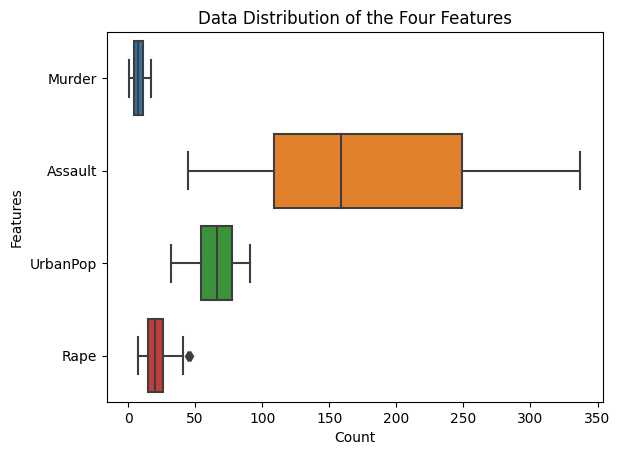

In [13]:
#Creating a boxplot to identify feature distributions

sns.boxplot(data=df,orient='h')
plt.ylabel('Features')
plt.xlabel('Count')
plt.title('Data Distribution of the Four Features')
plt.show()

### Principal Component Analysis (PCA)

#### Using PCA to reduce the number of dimensions

In [14]:
#Fitting PCA and understanding the 'explained variance ratio'
pca = PCA().fit(df_scale)
pca.explained_variance_ratio_


array([0.64272873, 0.22804606, 0.08097894, 0.04824627])

#### The above suggests that two components explain over 85% of variance (0.62 + 0.24 = 0.86). And the other two components have relatively lower contribution to the variance within our data. However, lets use a graph to visually identify the number of components required

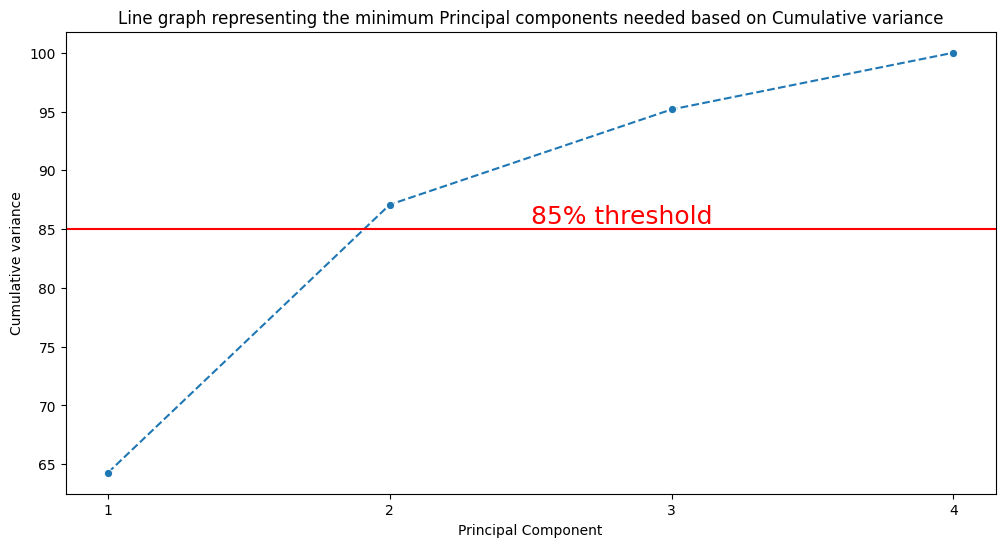

In [15]:
#creating a graph to show the minimum number of components needed for our analysis

X = np.arange(1,5, step = 1)
plt.figure(figsize=(12,6))
sns.lineplot(x=X,y=np.cumsum(pca.explained_variance_ratio_)*100, linestyle='--', marker='o')
plt.title('Line graph representing the minimum Principal components needed based on Cumulative variance')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1,5,step = 1))
plt.ylabel('Cumulative variance')
plt.axhline(y=85,color='r',linestyle = '-')
plt.text(2.5,85.5,'85% threshold', color = 'red',fontsize = 18)
plt.show()


#### Now that we know we need 2 components, lets Create a new 'scaled' dataframe with the new dimensions

In [16]:
dimensions = 2 # selected number of dimensions
pca = PCA(n_components=dimensions)
PC = pca.fit_transform(df_scale)
PC_df = pd.DataFrame(PC, columns=['Principal Component 1', 'Principal Component 2'])
PC_df.head()

,Principal Component 1,Principal Component 2
0,0.293082,0.273177
1,0.497299,0.225498
2,0.460302,-0.201380
3,-0.006003,0.275698
4,0.612016,-0.409985


### Intrepretation of PCA dimensionality reduction
##### What the above graphs tells us is that component 1 contains 62% of all explained variances within our data. Component 2 contains 24.74% of all explained variances. Adding all this up, we find that with 2 Principal components, we achieve a explaination of variance within our data of 86.74%. What this means is that we effectively can reduce the number of dimensions from 4 t o2 (50% reduction) and yet maintain a 86.74% explanation value as to how our features deviate or affects one another.

### Visualize the PCA in a Biplot

In [23]:
def biplot(score,coeff,labels=None): 
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min()) 
    plt.scatter(xs * scalex,ys * scaley,s=5, color='orange') 
    for i in range(n): 
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'purple',alpha = 0.5) 
    if labels is None: 
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center') 
    else: plt.text

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 
 
    plt.figure()

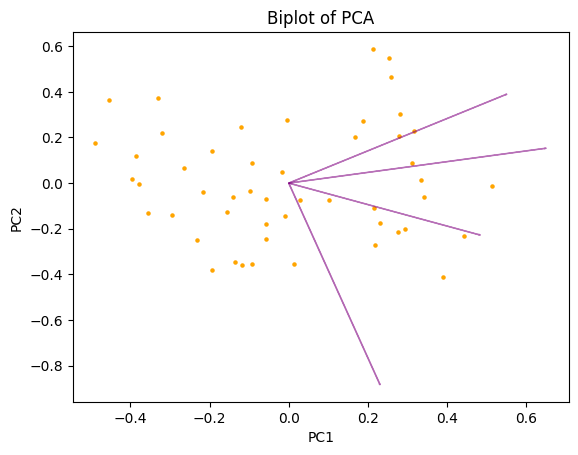

<Figure size 640x480 with 0 Axes>

In [25]:
plt.title('Biplot of PCA')
 
biplot(PC, 
       np.transpose(pca.components_), 
       list(df.columns))

## Hierarchical Clustering

### This method seeks to build a hierarchy of clusters using two categories. 1) Agglomerative: This is a "bottom up" approach. Each observations starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. 2) Divisive: This is a "top down" approach. All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy. Also, linkage methods define proximity between any two clusters at every step. Three methods will be used:
### a) single linkage or nearest neighbor. Proximity between two clusters is the proximity between their two closest objects
### b) complete linkage or farthest neighbor. Proximity between two clusters is the proximity between their two most distant objects
### c) average linkage - Proximity between two clusters is the arithmetic mean of all the proximities between the objects of one, on one side, and the objects of the other, on the other side.

### The results are presented in dendograms

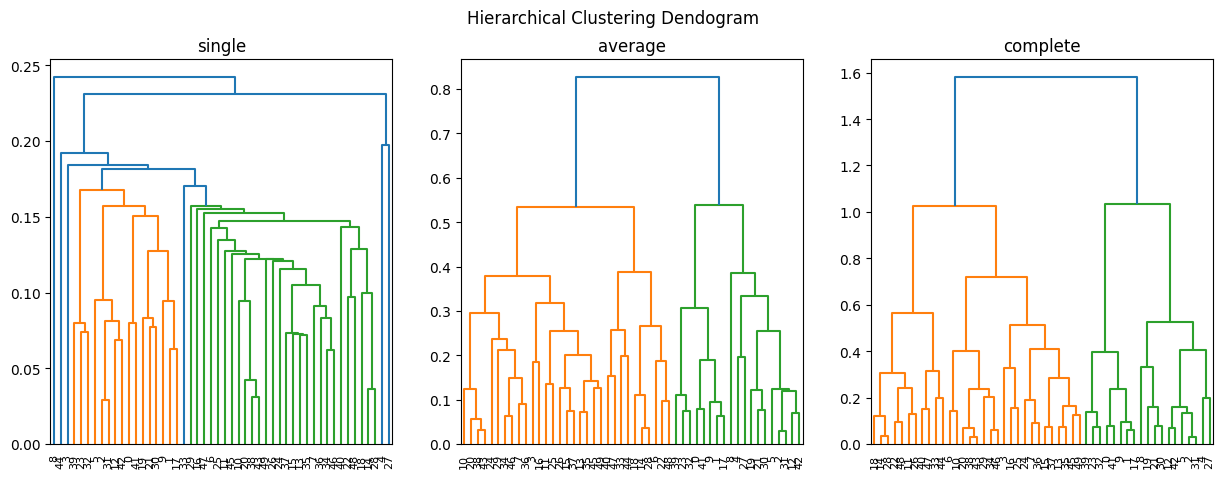

In [17]:

#Fitting the model
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(PC_df)

linkage_methods = ['single', 'average', 'complete']

fig,(ax) = plt.subplots(1,len(linkage_methods), figsize=(15,5))
fig.suptitle('Hierarchical Clustering Dendogram')
for i, method in enumerate (linkage_methods):
    ax[i].set_title(method)
    dendrogram(linkage(PC_df, method=method), labels=PC_df.index, ax=ax[i])
plt.show()

#### From the dendrograms above, the complete linkage method creates the most balanced and dissimilar dispersion of clusters and will therefore be the method of choice for the rest of this analysis. We can see that the number of clusters are 2 based on dissimilarity.

##### Lets see a clearer dendrogram for the complete linkage method

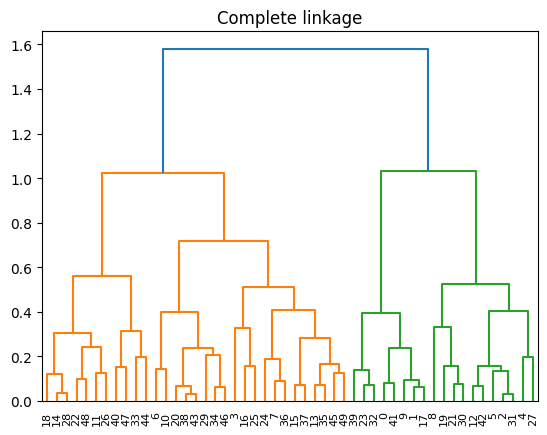

In [18]:
plt.title("Complete linkage")
dendrogram(linkage(PC_df, method='complete'), labels=PC_df.index)
plt.show()

#### The above dendogram, combined with the below K-means cluster scatter plot, shows that the Arrests per capita can be divided into two clusters, one where all the states with higher number of arrests per capita (green color dendogram) vs the other cluster where the arrests per capita is lower (orange color dendogram)

## K-Means Clustering

### Utilizing K-Means clustering model on the PCA dataframe

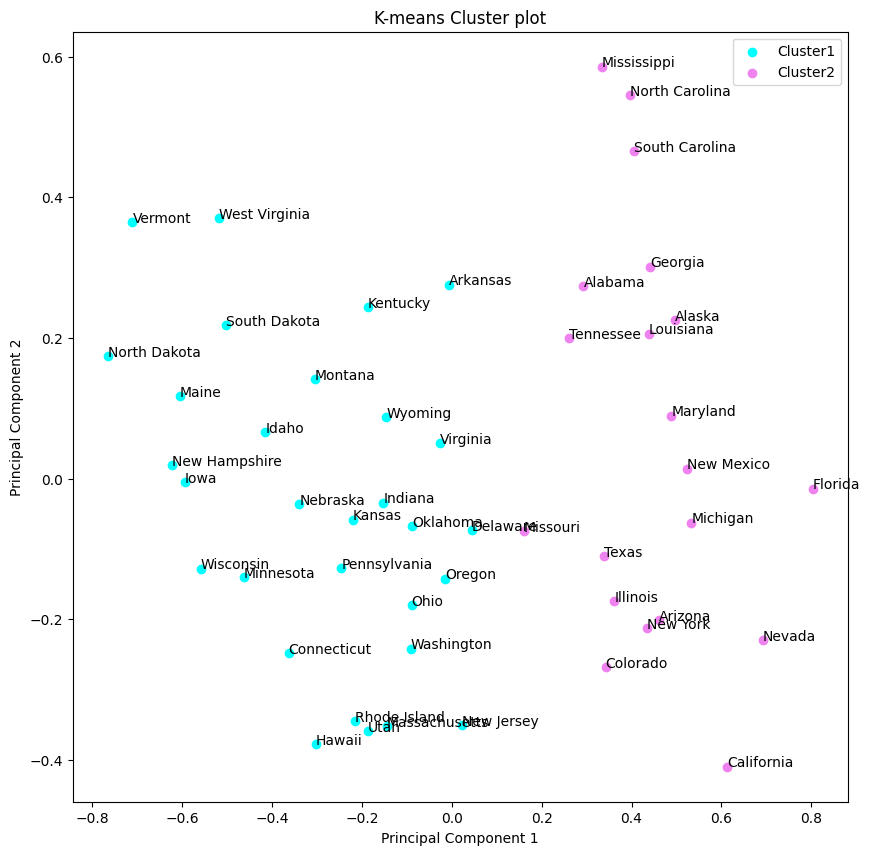

In [19]:
#Extracting the components
x = PC_df['Principal Component 1']
y = PC_df['Principal Component 2']
cities = df['City']

# Fit k-means
k = 2 #two clusters
cluster_labels = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']
cluster_colors = ['aqua', 'violet', 'blue', 'red']

#calculate k means clusters
KMeans_Model = KMeans(n_clusters=k, init='k-means++', random_state=123, n_init='auto').fit(df_scale)
cluster_codes = KMeans_Model.fit_predict(PC_df)

#plot clusters
fig, ax = plt.subplots(figsize=(10,10))
for i in range(0,2):
    ax.scatter(x[cluster_codes == i], y[cluster_codes == i], c=cluster_colors[i], label = cluster_labels[i])
for i in range(0, len(x)):
    ax.annotate(cities[i], (x[i], y[i]))

ax.set_title("K-means Cluster plot")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.legend()
plt.show()

### Printing the pca component vectors to show the correlation between the two prinicipal components and the original parameters:

In [20]:
print(pca.components_)

[[ 0.54750034  0.64593081  0.22955857  0.47991627]
 [ 0.38795783  0.15212429 -0.8804443  -0.22619628]]




### Intrepretation of PCA components
#### The PCA component vectors indicate that:
##### Prinicipal Component 1 is calculated predominantly from the sum of all arrest parameters (coefficients 0.54, 0.64 and 0.48 aligning to the arrests columns in the data frame), hence it is an indicator of the total arrests per capita
##### Principal Component 2 is calculated predominantly from the population (coefficient -0.88 aligning with the urban population column in the dataframe) and therefore it is an indicator of the urban population

##### The scatter plot above shows that the clustering splits well the dataset along Principal Component 1 (total arrests per capita) and that the urban population (Prinicipal Component 2) is similar along the top level clusters.

##### CONCLUSION:

##### The analysis splits the dataset into two clusters:
##### Cluster 1 (Aqua color) - lower total arrests per capita
##### Cluster 2 (violet color) - higher total arrests per capita
